In [1]:
!pip install keras
!pip install tensorflow

In [2]:
#Importovanie potrebnych kniznic
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
#Data pre vizualizaciu
data = pd.read_csv('wineQualityReds.csv')

In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [5]:
data.tail(10)

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1589            6.6             0.725         0.20             7.8      0.073   
1590            6.3             0.550         0.15             1.8      0.077   
1591            5.4             0.740         0.09             1.7      0.089   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1589                 29.0                  79.0  0.99770  3.29       0.54   
1590                 26.0                  35.0  0.99314  3.32       0.82   
1591                 16.0                  26.0  0.99402  3.67       0.56   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1589      9.2        5  
1590     11.6        6  
1591     11.6        6  
1592     11.0        6  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

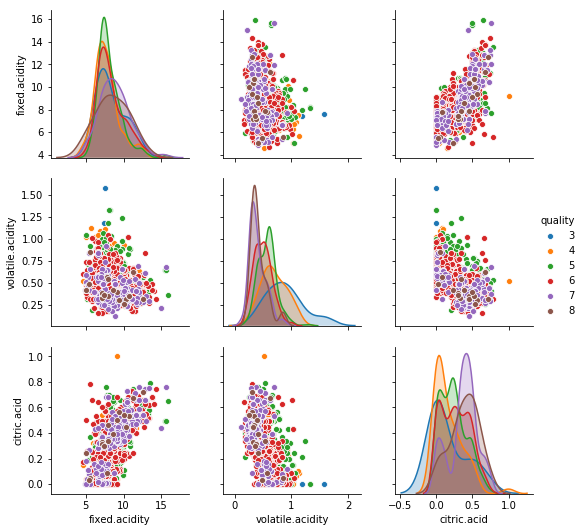

In [6]:
first = sns.pairplot(
    data, vars=['fixed.acidity','volatile.acidity','citric.acid'],
    hue="quality")
plt.show(first)

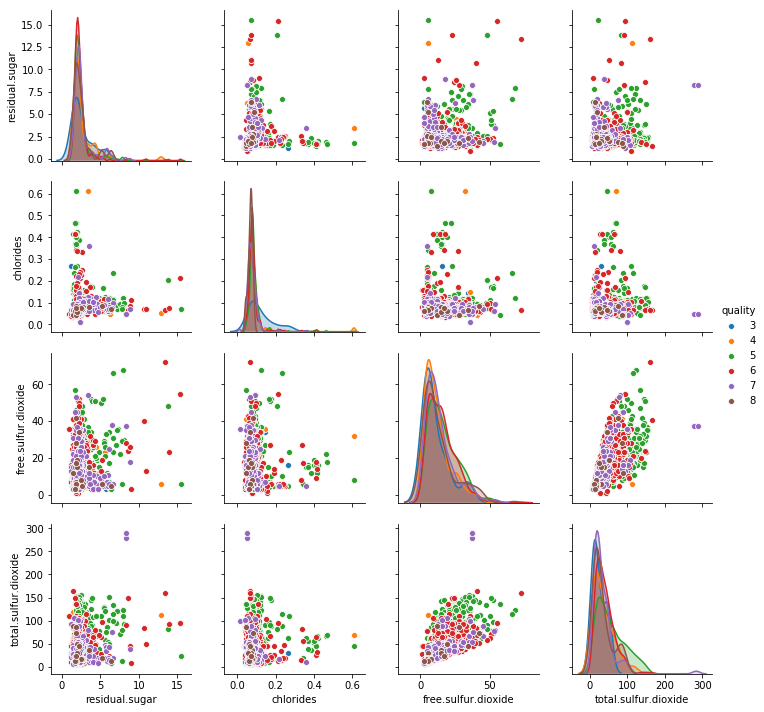

In [7]:
second = sns.pairplot(data, vars=["residual.sugar", "chlorides","free.sulfur.dioxide","total.sulfur.dioxide"], hue="quality")
plt.show(second)

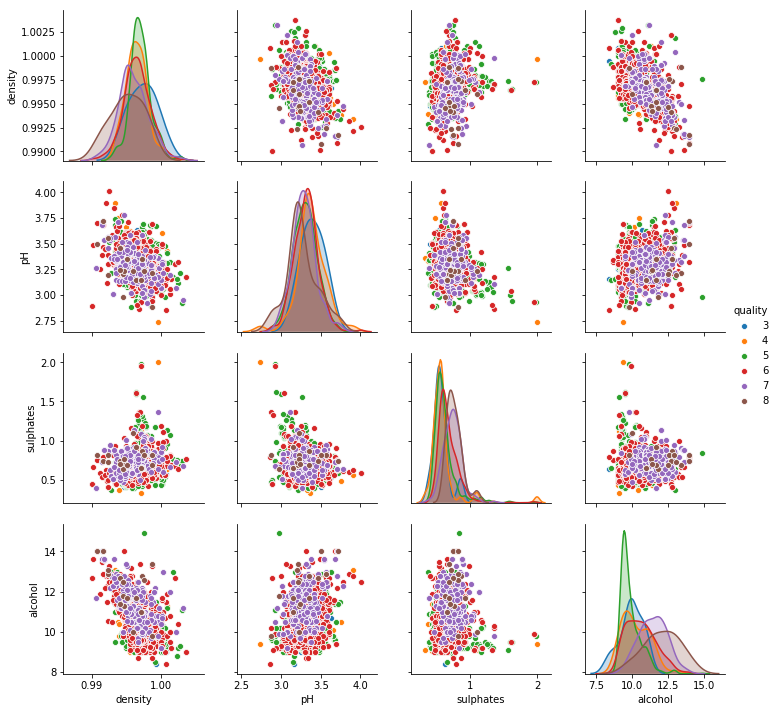

In [8]:
third = sns.pairplot(data, vars=["density","pH","sulphates","alcohol"], hue="quality")
plt.show(third)

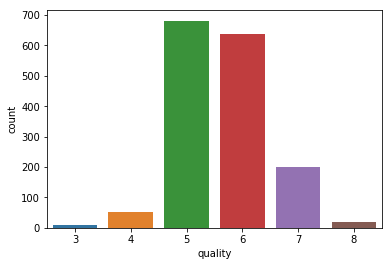

In [9]:
#Graf podla poctu vin danej kvality
wine_quality = sns.countplot(x="quality", data=data)
plt.show(wine_quality)

In [10]:
#Učenie neurónovej siete

dataset = np.loadtxt("wineQualityRedsithout.csv", delimiter=",")

input = dataset[:, 0:11]
output = dataset[:, 11]

output = [(round(each / 10)) for each in output]

model = Sequential()
model.add(Dense(100, input_dim=11, init='uniform', activation='relu'))
model.add(Dense(80, init='uniform', activation='relu'))
model.add(Dense(20, init='uniform', activation='relu'))
model.add(Dense(4, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(input, output, epochs=1000, batch_size=50, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=11, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="uniform")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="si

Epoch 1/1000
 - 0s - loss: 0.6927 - acc: 0.5328
Epoch 2/1000
 - 0s - loss: 0.6897 - acc: 0.5347
Epoch 3/1000
 - 0s - loss: 0.6731 - acc: 0.5347
Epoch 4/1000
 - 0s - loss: 0.6645 - acc: 0.5522
Epoch 5/1000
 - 0s - loss: 0.6617 - acc: 0.6304
Epoch 6/1000
 - 0s - loss: 0.6589 - acc: 0.6298
Epoch 7/1000
 - 0s - loss: 0.6596 - acc: 0.6254
Epoch 8/1000
 - 0s - loss: 0.6512 - acc: 0.6423
Epoch 9/1000
 - 0s - loss: 0.6491 - acc: 0.6316
Epoch 10/1000
 - 0s - loss: 0.6426 - acc: 0.6310
Epoch 11/1000
 - 0s - loss: 0.6351 - acc: 0.6404
Epoch 12/1000
 - 0s - loss: 0.6355 - acc: 0.6467
Epoch 13/1000
 - 0s - loss: 0.6282 - acc: 0.6473
Epoch 14/1000
 - 0s - loss: 0.6155 - acc: 0.6679
Epoch 15/1000
 - 0s - loss: 0.6186 - acc: 0.6617
Epoch 16/1000
 - 0s - loss: 0.6086 - acc: 0.6773
Epoch 17/1000
 - 0s - loss: 0.6014 - acc: 0.6942
Epoch 18/1000
 - 0s - loss: 0.5889 - acc: 0.7011
Epoch 19/1000
 - 0s - loss: 0.5831 - acc: 0.7023
Epoch 20/1000
 - 0s - loss: 0.5776 - acc: 0.7104
Epoch 21/1000
 - 0s - loss: 0

 - 0s - loss: 0.5016 - acc: 0.7548
Epoch 168/1000
 - 0s - loss: 0.5120 - acc: 0.7561
Epoch 169/1000
 - 0s - loss: 0.5107 - acc: 0.7536
Epoch 170/1000
 - 0s - loss: 0.5180 - acc: 0.7530
Epoch 171/1000
 - 0s - loss: 0.5336 - acc: 0.7411
Epoch 172/1000
 - 0s - loss: 0.5046 - acc: 0.7586
Epoch 173/1000
 - 0s - loss: 0.5052 - acc: 0.7467
Epoch 174/1000
 - 0s - loss: 0.5087 - acc: 0.7530
Epoch 175/1000
 - 0s - loss: 0.5023 - acc: 0.7536
Epoch 176/1000
 - 0s - loss: 0.5155 - acc: 0.7580
Epoch 177/1000
 - 0s - loss: 0.5084 - acc: 0.7486
Epoch 178/1000
 - 0s - loss: 0.5022 - acc: 0.7555
Epoch 179/1000
 - 0s - loss: 0.4998 - acc: 0.7530
Epoch 180/1000
 - 0s - loss: 0.5012 - acc: 0.7586
Epoch 181/1000
 - 0s - loss: 0.5034 - acc: 0.7561
Epoch 182/1000
 - 0s - loss: 0.5104 - acc: 0.7523
Epoch 183/1000
 - 0s - loss: 0.5098 - acc: 0.7467
Epoch 184/1000
 - 0s - loss: 0.5044 - acc: 0.7580
Epoch 185/1000
 - 0s - loss: 0.5016 - acc: 0.7530
Epoch 186/1000
 - 0s - loss: 0.5058 - acc: 0.7511
Epoch 187/1000


 - 0s - loss: 0.4760 - acc: 0.7736
Epoch 332/1000
 - 0s - loss: 0.4716 - acc: 0.7824
Epoch 333/1000
 - 0s - loss: 0.4706 - acc: 0.7817
Epoch 334/1000
 - 0s - loss: 0.4829 - acc: 0.7711
Epoch 335/1000
 - 0s - loss: 0.4702 - acc: 0.7799
Epoch 336/1000
 - 0s - loss: 0.4770 - acc: 0.7749
Epoch 337/1000
 - 0s - loss: 0.4696 - acc: 0.7699
Epoch 338/1000
 - 0s - loss: 0.4722 - acc: 0.7736
Epoch 339/1000
 - 0s - loss: 0.4865 - acc: 0.7605
Epoch 340/1000
 - 0s - loss: 0.4810 - acc: 0.7686
Epoch 341/1000
 - 0s - loss: 0.4714 - acc: 0.7799
Epoch 342/1000
 - 0s - loss: 0.4701 - acc: 0.7805
Epoch 343/1000
 - 0s - loss: 0.4812 - acc: 0.7774
Epoch 344/1000
 - 0s - loss: 0.4713 - acc: 0.7761
Epoch 345/1000
 - 0s - loss: 0.4684 - acc: 0.7792
Epoch 346/1000
 - 0s - loss: 0.4823 - acc: 0.7730
Epoch 347/1000
 - 0s - loss: 0.4835 - acc: 0.7667
Epoch 348/1000
 - 0s - loss: 0.4744 - acc: 0.7774
Epoch 349/1000
 - 0s - loss: 0.4781 - acc: 0.7692
Epoch 350/1000
 - 0s - loss: 0.4760 - acc: 0.7761
Epoch 351/1000


Epoch 496/1000
 - 0s - loss: 0.4263 - acc: 0.8005
Epoch 497/1000
 - 0s - loss: 0.4140 - acc: 0.8149
Epoch 498/1000
 - 0s - loss: 0.4204 - acc: 0.8099
Epoch 499/1000
 - 0s - loss: 0.4378 - acc: 0.7942
Epoch 500/1000
 - 0s - loss: 0.4229 - acc: 0.8036
Epoch 501/1000
 - 0s - loss: 0.4263 - acc: 0.8061
Epoch 502/1000
 - 0s - loss: 0.4147 - acc: 0.8211
Epoch 503/1000
 - 0s - loss: 0.4207 - acc: 0.8143
Epoch 504/1000
 - 0s - loss: 0.4264 - acc: 0.7986
Epoch 505/1000
 - 0s - loss: 0.4224 - acc: 0.8086
Epoch 506/1000
 - 0s - loss: 0.4165 - acc: 0.8093
Epoch 507/1000
 - 0s - loss: 0.4241 - acc: 0.8061
Epoch 508/1000
 - 0s - loss: 0.4168 - acc: 0.8130
Epoch 509/1000
 - 0s - loss: 0.4227 - acc: 0.8005
Epoch 510/1000
 - 0s - loss: 0.4202 - acc: 0.8124
Epoch 511/1000
 - 0s - loss: 0.4230 - acc: 0.8074
Epoch 512/1000
 - 0s - loss: 0.4267 - acc: 0.8030
Epoch 513/1000
 - 0s - loss: 0.4187 - acc: 0.8011
Epoch 514/1000
 - 0s - loss: 0.4200 - acc: 0.8099
Epoch 515/1000
 - 0s - loss: 0.4138 - acc: 0.8186


Epoch 660/1000
 - 0s - loss: 0.3740 - acc: 0.8336
Epoch 661/1000
 - 0s - loss: 0.3596 - acc: 0.8487
Epoch 662/1000
 - 0s - loss: 0.3681 - acc: 0.8399
Epoch 663/1000
 - 0s - loss: 0.3578 - acc: 0.8468
Epoch 664/1000
 - 0s - loss: 0.3736 - acc: 0.8361
Epoch 665/1000
 - 0s - loss: 0.3699 - acc: 0.8293
Epoch 666/1000
 - 0s - loss: 0.3610 - acc: 0.8443
Epoch 667/1000
 - 0s - loss: 0.3668 - acc: 0.8437
Epoch 668/1000
 - 0s - loss: 0.3458 - acc: 0.8562
Epoch 669/1000
 - 0s - loss: 0.3701 - acc: 0.8368
Epoch 670/1000
 - 0s - loss: 0.3719 - acc: 0.8355
Epoch 671/1000
 - 0s - loss: 0.3712 - acc: 0.8361
Epoch 672/1000
 - 0s - loss: 0.3760 - acc: 0.8349
Epoch 673/1000
 - 0s - loss: 0.3707 - acc: 0.8386
Epoch 674/1000
 - 0s - loss: 0.3622 - acc: 0.8437
Epoch 675/1000
 - 0s - loss: 0.3635 - acc: 0.8455
Epoch 676/1000
 - 0s - loss: 0.3560 - acc: 0.8480
Epoch 677/1000
 - 0s - loss: 0.3570 - acc: 0.8405
Epoch 678/1000
 - 0s - loss: 0.3636 - acc: 0.8393
Epoch 679/1000
 - 0s - loss: 0.3680 - acc: 0.8424


Epoch 824/1000
 - 0s - loss: 0.3108 - acc: 0.8724
Epoch 825/1000
 - 0s - loss: 0.3070 - acc: 0.8737
Epoch 826/1000
 - 0s - loss: 0.2894 - acc: 0.8780
Epoch 827/1000
 - 0s - loss: 0.2840 - acc: 0.8887
Epoch 828/1000
 - 0s - loss: 0.2992 - acc: 0.8693
Epoch 829/1000
 - 0s - loss: 0.3098 - acc: 0.8743
Epoch 830/1000
 - 0s - loss: 0.3344 - acc: 0.8637
Epoch 831/1000
 - 0s - loss: 0.3514 - acc: 0.8549
Epoch 832/1000
 - 0s - loss: 0.2893 - acc: 0.8824
Epoch 833/1000
 - 0s - loss: 0.3077 - acc: 0.8699
Epoch 834/1000
 - 0s - loss: 0.3087 - acc: 0.8724
Epoch 835/1000
 - 0s - loss: 0.2844 - acc: 0.8774
Epoch 836/1000
 - 0s - loss: 0.2760 - acc: 0.8893
Epoch 837/1000
 - 0s - loss: 0.2944 - acc: 0.8749
Epoch 838/1000
 - 0s - loss: 0.3087 - acc: 0.8718
Epoch 839/1000
 - 0s - loss: 0.2838 - acc: 0.8856
Epoch 840/1000
 - 0s - loss: 0.2968 - acc: 0.8780
Epoch 841/1000
 - 0s - loss: 0.2800 - acc: 0.8849
Epoch 842/1000
 - 0s - loss: 0.2848 - acc: 0.8799
Epoch 843/1000
 - 0s - loss: 0.2836 - acc: 0.8868


Epoch 988/1000
 - 0s - loss: 0.3164 - acc: 0.8730
Epoch 989/1000
 - 0s - loss: 0.2979 - acc: 0.8755
Epoch 990/1000
 - 0s - loss: 0.2448 - acc: 0.8999
Epoch 991/1000
 - 0s - loss: 0.2255 - acc: 0.9124
Epoch 992/1000
 - 0s - loss: 0.2120 - acc: 0.9156
Epoch 993/1000
 - 0s - loss: 0.2113 - acc: 0.9143
Epoch 994/1000
 - 0s - loss: 0.2407 - acc: 0.9012
Epoch 995/1000
 - 0s - loss: 0.2276 - acc: 0.9087
Epoch 996/1000
 - 0s - loss: 0.2427 - acc: 0.9024
Epoch 997/1000
 - 0s - loss: 0.2723 - acc: 0.8893
Epoch 998/1000
 - 0s - loss: 0.2918 - acc: 0.8780
Epoch 999/1000
 - 0s - loss: 0.3786 - acc: 0.8430
Epoch 1000/1000
 - 0s - loss: 0.2657 - acc: 0.8893


In [11]:
scores = model.evaluate(input, output)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1599/1599 [==============================] - 0s 46us/step

acc: 88.81%


In [12]:
for layer in model.layers: print(layer.get_config(), layer.get_weights())

{'name': 'dense_1', 'trainable': True, 'batch_input_shape': (None, 11), 'dtype': 'float32', 'units': 100, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 0.21757539,  0.03850385,  0.10839874, ...,  0.17511778,
         0.08633298, -0.32260144],
       [ 1.38438976, -0.49630955, -0.78363442, ..., -0.35450187,
         0.20704791, -0.65305382],
       [ 0.14917947, -0.98092175,  0.25352848, ...,  0.18715096,
         0.69886655,  0.18001771],
       ..., 
       [ 0.11435313, -0.2080629 , -0.34859908, ..., -0.38776341,
         0.28171366, -0.03297674],
       [-0.636549  ,  0.82386953,  0.48492265, ...,  0.56602198,
        -1.66058528,  0.79455543],
       [-0.34049326,  0.1592037

In [13]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


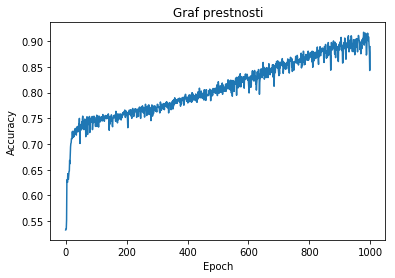

In [14]:
#Graf presnosti
plt.plot(history.history['acc'])
plt.title('Graf prestnosti')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

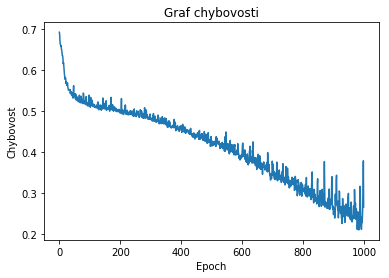

In [15]:
#Graf chybovosti
plt.plot(history.history['loss'])
plt.title('Graf chybovosti')
plt.ylabel('Chybovost')
plt.xlabel('Epoch')
plt.show()

In [16]:
predict_me = np.array([
   [5.7,1.13,0.09,1.5,0.172,7,19,0.994,3.5,0.48,9.8],    #4
   [7.6,0.39,0.31,2.3,0.082,23,71,0.9982,3.52,0.65,9.7], #5
   [8.1,0.38,0.28,2.1,0.066,13,30,0.9968,3.23,0.73,9.7]  #7
])

predictions = model.predict(predict_me, batch_size=32, verbose=1)

rounded = [round(5*output[0]+3) for output in predictions]

print(rounded)

3/3 [==============================] - 0s 10ms/step
[3.0, 4.0, 8.0]


In [17]:
!pip install ann_visualizer
!pip install graphviz

from graphviz import *
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="My first neural network")

  Running setup.py bdist_wheel for ann-visualizer ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'network.gv'], make sure the Graphviz executables are on your systems' PATH